<a href="https://colab.research.google.com/github/filzahms/DeepLearningM3/blob/main/Vegetables_filzah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cp /content/drive/MyDrive/vegetables.zip /content

In [2]:
!unzip /content/vegetables.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

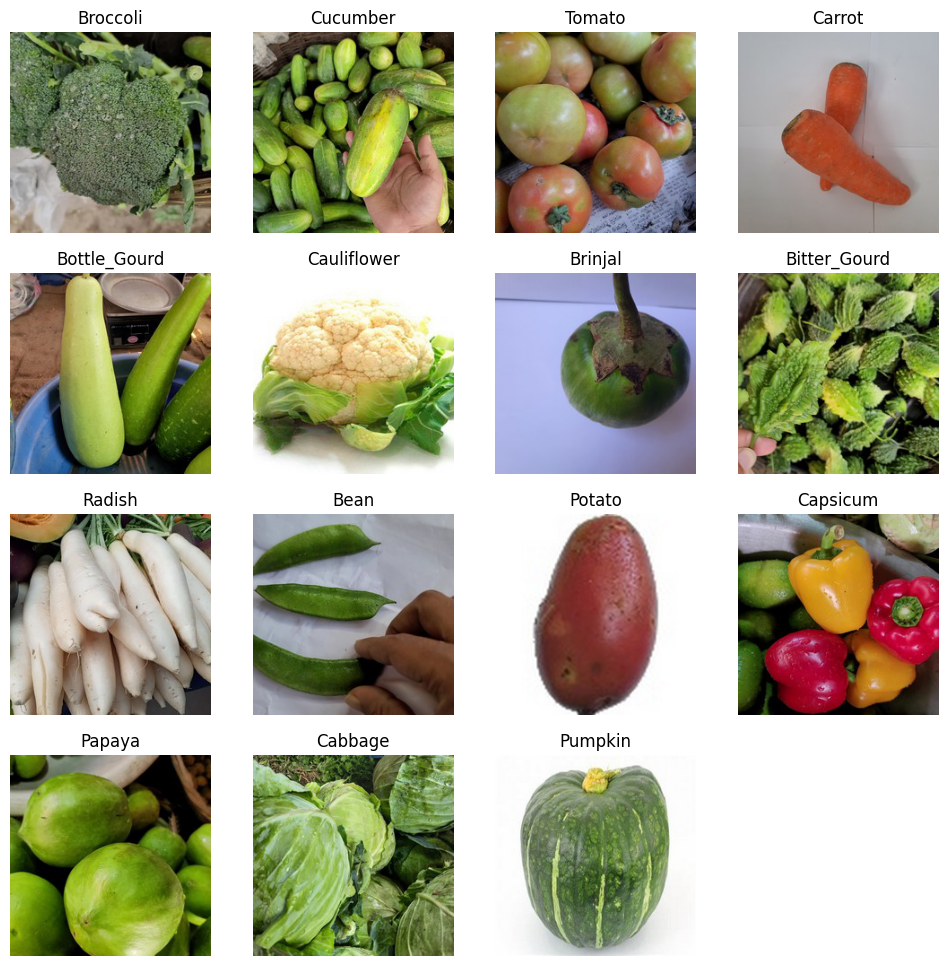

In [7]:
train_path = "/content/VegetableImages/train"
validation_path = "/content/VegetableImages/validation"
test_path = "/content/VegetableImages/test"

image_categories = os.listdir('/content/VegetableImages/train')

def plot_images(image_categories):
    
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = tf.keras.utils.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

plot_images(image_categories)

In [8]:
train_gen = ImageDataGenerator(rescale = 1.0/255.0)
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

val_gen = ImageDataGenerator(rescale = 1.0/255.0)
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

test_gen = ImageDataGenerator(rescale = 1.0/255.0)
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [9]:
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [11]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/100
468/468 [==============================] - 46s 76ms/step - loss: 1.4722 - accuracy: 0.5074 - val_loss: 0.7754 - val_accuracy: 0.7752
Epoch 2/100
468/468 [==============================] - 41s 87ms/step - loss: 0.6886 - accuracy: 0.7767 - val_loss: 0.4363 - val_accuracy: 0.8679
Epoch 3/100
468/468 [==============================] - 40s 85ms/step - loss: 0.4473 - accuracy: 0.8535 - val_loss: 0.2913 - val_accuracy: 0.9140
Epoch 4/100
468/468 [==============================] - 40s 85ms/step - loss: 0.2754 - accuracy: 0.9105 - val_loss: 0.2889 - val_accuracy: 0.9197
Epoch 5/100
468/468 [==============================] - 34s 73ms/step - loss: 0.2308 - accuracy: 0.9246 - val_loss: 0.2357 - val_accuracy: 0.9321
Epoch 6/100
468/468 [==============================] - 40s 85ms/step - loss: 0.1807 - accuracy: 0.9405 - val_loss: 0.2974 - val_accuracy: 0.9254
Epoch 7/100
468/468 [==============================] - 36s 76ms/step - loss: 0.1574 - accuracy: 0.9484 - val_loss: 0.2681 - val_ac

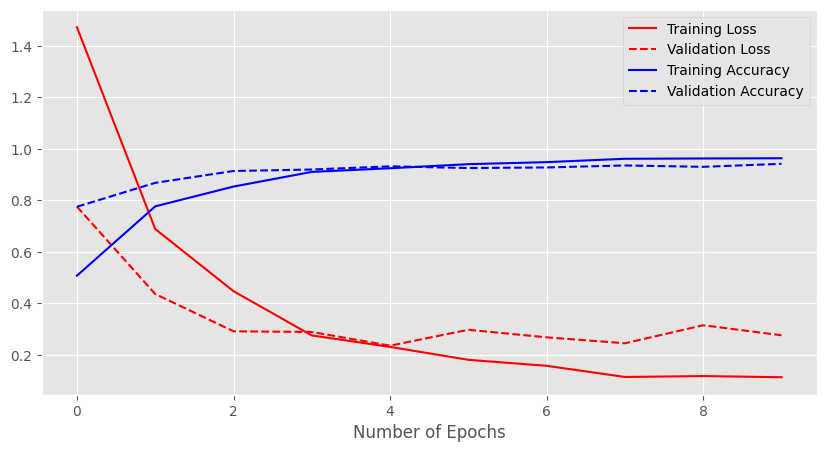

In [12]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [13]:
model.evaluate(test_image_generator)

94/94 [==============================] - 5s 52ms/step - loss: 0.2228 - accuracy: 0.9437


[0.2228439301252365, 0.9436666369438171]

1/1 [==============================] - 0s 240ms/step


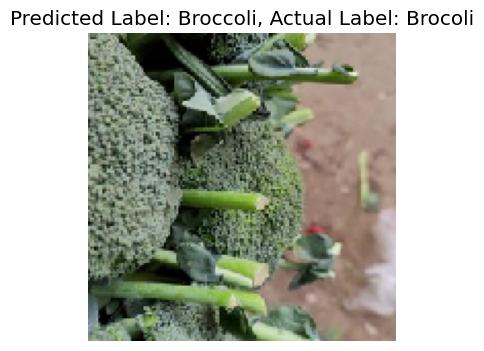

In [14]:
test_image_path = '/content/VegetableImages/test/Broccoli/1011.jpg'

def generate_predictions(test_image_path, actual_label):
    
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

generate_predictions(test_image_path, actual_label='Brocoli')

In [15]:
!wget "https://www.dropbox.com/s/i020rz847u8bq09/beans.jpg?dl=0"

--2023-04-12 12:30:51--  https://www.dropbox.com/s/i020rz847u8bq09/beans.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/i020rz847u8bq09/beans.jpg [following]
--2023-04-12 12:30:51--  https://www.dropbox.com/s/raw/i020rz847u8bq09/beans.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc4d5dc069fb50eb41915dc8914.dl.dropboxusercontent.com/cd/0/inline/B6Ddz4I9WCMkMsEuGHfLCBX1C8lc0RkyA6sbsfUFHKzvTfHa0IKrcQt2BeQkJ-iJrX-FC_0zp2Vnwxay43JavhizZhm_D01JOsvhHOJv6y-vXOaTHUHxeaYekv37vjxHxTVdMQHNgV-wOUaWcRqibSILmmraRpa4qbERcRT-ZpfFzA/file# [following]
--2023-04-12 12:30:52--  https://ucc4d5dc069fb50eb41915dc8914.dl.dropboxusercontent.com/cd/0/inline/B6Ddz4I9WCMkMsEuGHfLCBX1C8lc0RkyA6sbsfUFHKzvTfHa0IKrcQt2BeQkJ-iJrX-FC_0zp2Vnwxay43Ja

In [16]:
!wget "https://www.dropbox.com/s/lge1plvr4mg5w7y/potato_2.jpg?dl=0"

--2023-04-12 12:31:00--  https://www.dropbox.com/s/lge1plvr4mg5w7y/potato_2.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/lge1plvr4mg5w7y/potato_2.jpg [following]
--2023-04-12 12:31:00--  https://www.dropbox.com/s/raw/lge1plvr4mg5w7y/potato_2.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc188424cec51776a2c9e7039e49.dl.dropboxusercontent.com/cd/0/inline/B6DNMX6mlR1UgSpXoSIVrcB1_AtzzmRv4ggVPYD_6T_Q735w5wZpgdTTUwH9k7AxCbBVtSprYr6fIczaZT5j7YlJref9JyKAnVHBi3E18KMLtry7nqyRI5rH0i4DGuUMlOvoYjc3oyvvmYW5_GAiNLv-sPg3XaCUtOVVFTFWjdp_Nw/file# [following]
--2023-04-12 12:31:01--  https://uc188424cec51776a2c9e7039e49.dl.dropboxusercontent.com/cd/0/inline/B6DNMX6mlR1UgSpXoSIVrcB1_AtzzmRv4ggVPYD_6T_Q735w5wZpgdTTUwH9k7AxCbBVtSprYr6

1/1 [==============================] - 0s 21ms/step


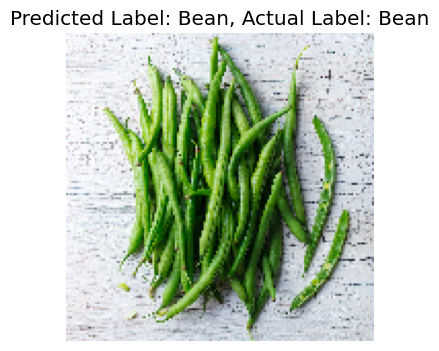

In [17]:
external_image_path_1 = "./beans.jpg?dl=0"
generate_predictions(external_image_path_1, actual_label='Bean')

1/1 [==============================] - 0s 17ms/step


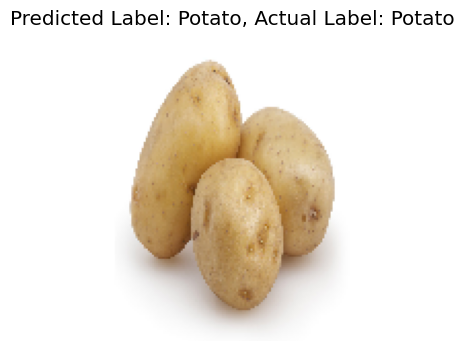

In [18]:
external_image_path_2 = "./potato_2.jpg?dl=0"
generate_predictions(external_image_path_2, actual_label='Potato')